In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import config 
import subprocess
import logging
from helpers.getpaths import get_paths, get_sumstats_path
from helpers import dbsnp, ldlink
import resources.immune_GWAS as immune_GWAS

In [2]:
# need to hardcode a column ordering for cell types from ImmunexUT

# will cluster on the full gene expression matrix

paths = get_paths(root='/media/')

ge = pd.read_csv(paths['ge_tokyo'], sep='\t')

ge.head()

,Gene_id,Gene_name,CD16p_Mono,CL_Mono,CM_CD8,DN_B,EM_CD8,Fr_III_T,Fr_II_eTreg,Fr_I_nTreg,...,Plasmablast,SM_B,TEMRA_CD8,Tfh,Th17,Th1,Th2,USM_B,mDC,pDC
0,ENSG00000000419,DPM1,75.529496,63.067643,97.727523,87.761895,85.401803,80.100159,82.803002,92.430490,...,65.845454,85.817089,81.270369,98.478194,94.817785,96.156457,99.289229,84.679789,70.563854,76.941529
1,ENSG00000000457,SCYL3,11.431484,8.868112,23.798439,19.454268,21.563597,25.793543,22.881275,26.210933,...,13.825426,22.670152,19.121705,23.009072,23.988126,23.195520,24.376872,19.106914,9.366901,44.306774
2,ENSG00000000460,C1orf112,8.727160,3.739787,9.619112,6.804246,6.066840,12.798690,15.269914,15.785120,...,2.743992,6.531154,5.917469,6.132987,5.025965,6.402213,7.174652,5.930073,3.091565,4.889874
3,ENSG00000000938,FGR,1266.656181,1009.778002,8.911390,444.695841,219.603989,0.217114,2.693323,1.737443,...,38.045147,126.305443,586.182769,3.328712,1.597220,14.389700,9.642535,228.484663,467.386862,21.008753
4,ENSG00000000971,CFH,0.095562,0.259676,6.895740,0.014145,20.699413,7.068437,0.061612,1.351231,...,0.002752,0.000000,11.207717,4.105366,30.322376,16.988707,4.492127,0.009231,0.164180,0.002614


In [10]:
ge = pd.read_csv(paths['ge_tokyo'], sep='\t')

ge = ge.set_index('Gene_name')

ge = ge.drop('Gene_id', axis=1)

import seaborn as sns

import numpy as np

ge = np.sqrt(ge)

ge

,CD16p_Mono,CL_Mono,CM_CD8,DN_B,EM_CD8,Fr_III_T,Fr_II_eTreg,Fr_I_nTreg,Int_Mono,LDG,...,Plasmablast,SM_B,TEMRA_CD8,Tfh,Th17,Th1,Th2,USM_B,mDC,pDC
Gene_name,,,,,,,,,,,,,,,,,,,,,
DPM1,8.690771,7.941514,9.885723,9.368132,9.241310,8.949869,9.099615,9.614078,8.267005,7.844587,...,8.114521,9.263751,9.015008,9.923618,9.737442,9.805940,9.964398,9.202162,8.400229,8.771632
SCYL3,3.381048,2.977938,4.878364,4.410699,4.643662,5.078734,4.783438,5.119661,3.149719,3.621537,...,3.718256,4.761318,4.372837,4.796777,4.897767,4.816173,4.937294,4.371146,3.060539,6.656333
C1orf112,2.954177,1.933853,3.101469,2.608495,2.463096,3.577526,3.907674,3.973049,2.648435,1.405566,...,1.656500,2.555612,2.432585,2.476487,2.241866,2.530260,2.678554,2.435174,1.758285,2.211306
FGR,35.590114,31.777004,2.985195,21.087813,14.819041,0.465955,1.641135,1.318121,35.462913,25.438171,...,6.168075,11.238569,24.211212,1.824476,1.263812,3.793376,3.105243,15.115709,21.619132,4.583531
CFH,0.309132,0.509584,2.625974,0.118933,4.549661,2.658653,0.248217,1.162424,0.382688,0.363440,...,0.052463,0.000000,3.347793,2.026170,5.506576,4.121736,2.119464,0.096079,0.405191,0.051132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL139254.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.075421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL591163.1,0.071501,0.000000,0.069613,0.181017,0.055320,0.095200,0.000000,0.052449,0.049734,0.068076,...,0.146149,0.208940,0.000000,0.000000,0.000000,0.078564,0.000000,0.124394,0.045850,0.126054
AL589702.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.049020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
x = ge.loc[ge.mean(axis=1)>1]

In [14]:
x

,CD16p_Mono,CL_Mono,CM_CD8,DN_B,EM_CD8,Fr_III_T,Fr_II_eTreg,Fr_I_nTreg,Int_Mono,LDG,...,Plasmablast,SM_B,TEMRA_CD8,Tfh,Th17,Th1,Th2,USM_B,mDC,pDC
Gene_name,,,,,,,,,,,,,,,,,,,,,
FGR,35.590114,31.777004,2.985195,21.087813,14.819041,0.465955,1.641135,1.318121,35.462913,25.438171,...,6.168075,11.238569,24.211212,1.824476,1.263812,3.793376,3.105243,15.115709,21.619132,4.583531
LAP3,16.501440,18.539807,9.044873,9.251092,9.518327,10.371351,11.812194,8.223375,19.418696,7.679591,...,12.978284,9.046821,9.463571,8.678064,8.991143,9.307362,8.861232,8.509180,19.745653,20.069396
MAD1L1,10.504137,8.320239,10.034432,10.073063,10.939516,12.486118,13.786186,12.774491,10.056829,3.546426,...,5.078700,9.693560,10.986367,11.077445,10.320016,10.950713,10.261868,9.701074,10.948713,11.034465
M6PR,24.686820,20.375506,20.737969,15.786999,20.088610,19.359567,16.572795,19.902689,24.068170,7.605428,...,10.598024,15.621399,19.894573,20.544635,22.134321,20.911094,22.157799,15.971719,21.936949,23.407477
CFLAR,14.473109,15.357266,14.596207,11.586444,17.419906,17.053940,16.649372,13.860880,13.955481,27.695013,...,12.925721,13.144205,17.287840,16.258587,16.407725,16.107829,15.597216,12.061524,12.428415,9.459628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIR3687-1,6.391679,5.473851,15.039396,12.726142,12.123508,11.758220,10.117926,15.325825,6.805697,2.494514,...,8.203410,12.594327,10.914313,13.201713,14.009191,12.807240,13.027876,13.460828,7.385605,7.848702
TRAC,0.443921,0.505956,43.974136,6.236294,40.780753,48.051717,51.021481,45.300409,0.447690,5.645942,...,4.650310,9.407098,42.541834,46.833118,46.490479,45.655311,43.164212,5.338471,0.742346,0.667006
PSMB3,21.112444,21.540639,17.466337,18.062233,17.591979,19.022448,21.328065,15.447840,22.000391,24.211788,...,18.296553,17.069379,17.697497,17.117134,17.837277,18.023222,17.401784,16.796546,22.263902,21.799974


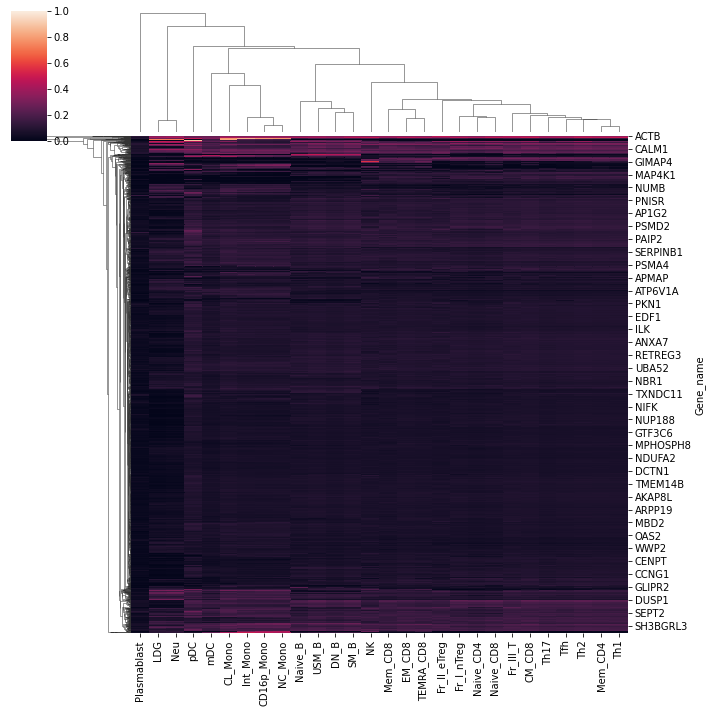

In [15]:
sns.clustermap(x, standard_scale=1)

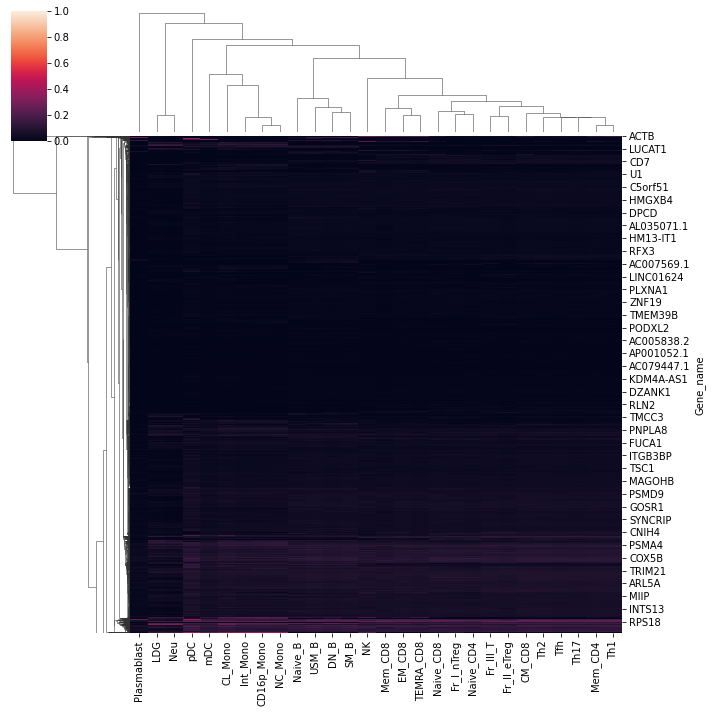

In [20]:
grid = sns.clustermap(x, standard_scale=1)

In [22]:
x = grid.dendrogram_col.reordered_ind

In [26]:
y = ge.iloc[:, x].columns
y

Index(['Plasmablast', 'LDG', 'Neu', 'pDC', 'mDC', 'CL_Mono', 'Int_Mono',
       'CD16p_Mono', 'NC_Mono', 'Naive_B', 'USM_B', 'DN_B', 'SM_B', 'NK',
       'Mem_CD8', 'EM_CD8', 'TEMRA_CD8', 'Naive_CD8', 'Fr_I_nTreg',
       'Naive_CD4', 'Fr_III_T', 'Fr_II_eTreg', 'CM_CD8', 'Th2', 'Tfh', 'Th17',
       'Mem_CD4', 'Th1'],
      dtype='object')

In [27]:
ge.loc[:,y]

,Plasmablast,LDG,Neu,pDC,mDC,CL_Mono,Int_Mono,CD16p_Mono,NC_Mono,Naive_B,...,Fr_I_nTreg,Naive_CD4,Fr_III_T,Fr_II_eTreg,CM_CD8,Th2,Tfh,Th17,Mem_CD4,Th1
Gene_name,,,,,,,,,,,,,,,,,,,,,
DPM1,8.114521,7.844587,8.660778,8.771632,8.400229,7.941514,8.267005,8.690771,8.433693,9.291018,...,9.614078,10.240525,8.949869,9.099615,9.885723,9.964398,9.923618,9.737442,9.627676,9.805940
SCYL3,3.718256,3.621537,3.597160,6.656333,3.060539,2.977938,3.149719,3.381048,3.544452,4.761457,...,5.119661,5.014699,5.078734,4.783438,4.878364,4.937294,4.796777,4.897767,4.758137,4.816173
C1orf112,1.656500,1.405566,1.318001,2.211306,1.758285,1.933853,2.648435,2.954177,3.009215,3.155789,...,3.973049,2.640200,3.577526,3.907674,3.101469,2.678554,2.476487,2.241866,2.505029,2.530260
FGR,6.168075,25.438171,26.480535,4.583531,21.619132,31.777004,35.462913,35.590114,34.822890,17.682710,...,1.318121,1.706406,0.465955,1.641135,2.985195,3.105243,1.824476,1.263812,6.602090,3.793376
CFH,0.052463,0.363440,0.277302,0.051132,0.405191,0.509584,0.382688,0.309132,0.306777,0.049638,...,1.162424,0.496553,2.658653,0.248217,2.625974,2.119464,2.026170,5.506576,4.268992,4.121736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL139254.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066088,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL591163.1,0.146149,0.068076,0.000000,0.126054,0.045850,0.000000,0.049734,0.071501,0.000000,0.046093,...,0.052449,0.000000,0.095200,0.000000,0.069613,0.000000,0.000000,0.000000,0.045869,0.078564
AL589702.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
